# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/demo01.csv')
df.shape

(16650, 16)

In [2]:
df_limpo = df.drop_duplicates()
df_limpo.shape

(6770, 16)

In [3]:
df_limpo.reset_index(drop=True, inplace=True)

In [4]:
df_encoded = df_limpo.copy()
df_encoded.shape

(6770, 16)

In [5]:
df_encoded.sexo.unique()

array(['M', 'F'], dtype=object)

In [8]:
from pandas.core.reshape.encoding import get_dummies

# Re-initialize df_encoded from df_limpo to ensure original columns are present
df_encoded = df_limpo.copy()

df_encoded.sexo = df_encoded.sexo.map({'F': 0, 'M': 1})
df_encoded.posse_de_veiculo = df_encoded.posse_de_veiculo.map({'N': 0, 'Y': 1})
df_encoded.posse_de_imovel = df_encoded.posse_de_imovel.map({'N': 0, 'Y': 1})
df_encoded = get_dummies(df_encoded, columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True, dtype=float)
df_encoded.shape

(6770, 29)

In [9]:
df_encoded.mau = df_encoded.mau.astype(int)

In [27]:
print("Frequencia absoluta:")
print(df_encoded.mau.value_counts())

print("\nFrequencia relativa (%):")
print(df_encoded['mau'].value_counts(normalize=True) * 100)

Frequencia absoluta:
mau
0    6472
1     298
Name: count, dtype: int64

Frequencia relativa (%):
mau
0    95.598227
1     4.401773
Name: proportion, dtype: float64


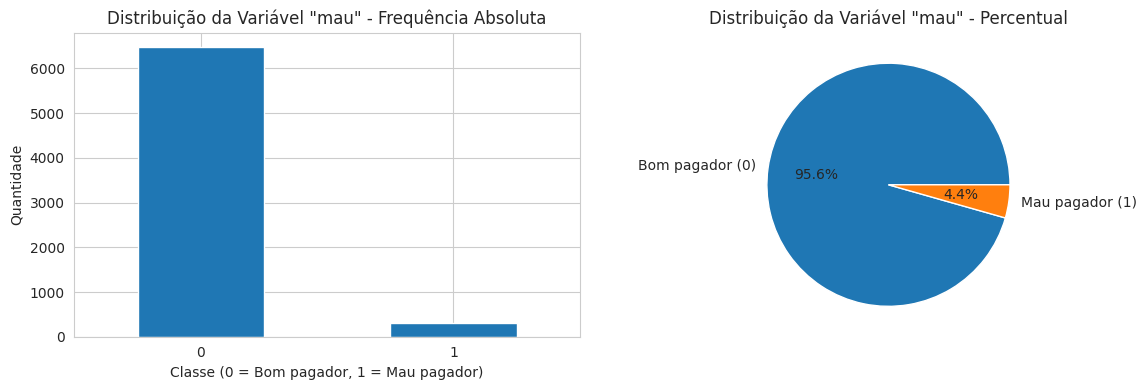

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(12, 4))

# Gráfico 1: Barras com frequência absoluta
plt.subplot(1, 2, 1)
df_encoded['mau'].value_counts().plot(kind='bar')
plt.title('Distribuição da Variável "mau" - Frequência Absoluta')
plt.xlabel('Classe (0 = Bom pagador, 1 = Mau pagador)')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)

# Gráfico 2: Pizza com percentuais
plt.subplot(1, 2, 2)
df_encoded['mau'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                             labels=['Bom pagador (0)', 'Mau pagador (1)'])
plt.title('Distribuição da Variável "mau" - Percentual')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [30]:
# Criar um resumo completo da distribuição
resumo_mau = pd.DataFrame({
    'classe': ['Bom pagador (0)', 'Mau pagador (1)'],
    'frequencia': df_encoded['mau'].value_counts().values,
    'percentual': df_encoded['mau'].value_counts(normalize=True).values * 100
})

print("=== RESUMO DA VARIÁVEL RESPOSTA 'mau' ===")
print(resumo_mau)
print(f"\nTotal de registros: {len(df)}")

=== RESUMO DA VARIÁVEL RESPOSTA 'mau' ===
            classe  frequencia  percentual
0  Bom pagador (0)        6472   95.598227
1  Mau pagador (1)         298    4.401773

Total de registros: 16650


#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [15]:
metadados = pd.DataFrame({'variavel': df_encoded.columns, 'tipo': df_encoded.dtypes})

qtd_categorias = []

for coluna in df_encoded.columns:
  n_categorias = df_encoded[coluna].nunique()
  qtd_categorias.append(n_categorias)

metadados['qtd_categorias'] = qtd_categorias

print(metadados)

                                                                      variavel  \
sexo                                                                      sexo   
posse_de_veiculo                                              posse_de_veiculo   
posse_de_imovel                                                posse_de_imovel   
qtd_filhos                                                          qtd_filhos   
idade                                                                    idade   
tempo_emprego                                                    tempo_emprego   
possui_celular                                                  possui_celular   
possui_fone_comercial                                    possui_fone_comercial   
possui_fone                                                        possui_fone   
possui_email                                                      possui_email   
qt_pessoas_residencia                                    qt_pessoas_residencia   
mau             

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [34]:
print("="*50)
print("ANÁLISE: possui_email")
print("="*50)

crosstab_email = pd.crosstab(df_encoded['possui_email'], df_encoded['mau'])
print("\nFrequências Absolutas:")
print(crosstab_email)

crosstab_email_percent = pd.crosstab(df_encoded['possui_email'], df_encoded['mau'], normalize='index') * 100
print("\nPercentual por categoria (linha) - Taxa de Inadimplência:")
print(crosstab_email_percent)

print(f"\nTaxa de mau pagador quando não tem email (0): {crosstab_email_percent[1][0]:.2f}%")
print(f"Taxa de mau pagador quando tem email (1): {crosstab_email_percent[1][1]:.2f}%")

ANÁLISE: possui_email

Frequências Absolutas:
mau              0    1
possui_email           
0             5927  278
1              545   20

Percentual por categoria (linha) - Taxa de Inadimplência:
mau                   0         1
possui_email                     
0             95.519742  4.480258
1             96.460177  3.539823

Taxa de mau pagador quando não tem email (0): 4.48%
Taxa de mau pagador quando tem email (1): 3.54%


In [35]:
#from pandas.core.reshape.api import crosstab
print("="*50)
print("ANÁLISE: posse_de_veiculo")
print("="*50)

crosstab_veiculo = pd.crosstab(df_encoded['posse_de_veiculo'], df_encoded['mau'])
print("\nFrequências Absolutas:")
print(crosstab_veiculo)

crosstab_veiculo_percent = pd.crosstab(df_encoded['posse_de_veiculo'], df_encoded['mau'], normalize='index') * 100
print("\nPercentual por categoria (linha) - Taxa de Inadimplência:")
print(crosstab_veiculo_percent)

print(f"\nTaxa de mau pagador quando não tem veículo (0): {crosstab_veiculo_percent[1][0]:.2f}%")
print(f"Taxa de mau pagador quando tem veículo (1): {crosstab_veiculo_percent[1][1]:.2f}%")

ANÁLISE: posse_de_veiculo

Frequências Absolutas:
mau                  0    1
posse_de_veiculo           
0                 4021  190
1                 2451  108

Percentual por categoria (linha) - Taxa de Inadimplência:
mau                       0         1
posse_de_veiculo                     
0                 95.488008  4.511992
1                 95.779601  4.220399

Taxa de mau pagador quando não tem veículo (0): 4.51%
Taxa de mau pagador quando tem veículo (1): 4.22%


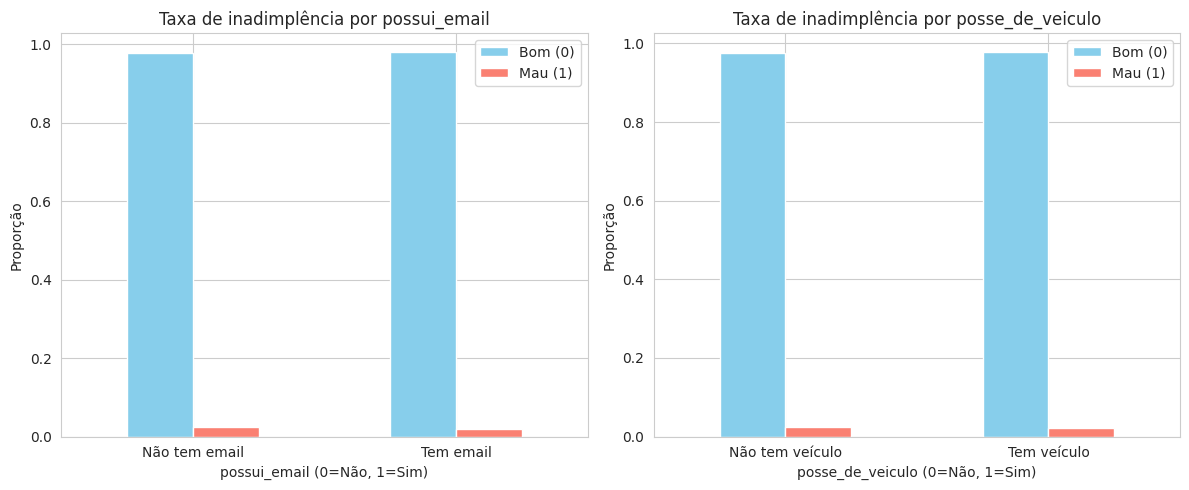

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um dataframe para visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico para possui_email
pd.crosstab(df['possui_email'], df['mau'], normalize='index').plot(
    kind='bar', ax=axes[0], color=['skyblue', 'salmon']
)
axes[0].set_title('Taxa de inadimplência por possui_email')
axes[0].set_xlabel('possui_email (0=Não, 1=Sim)')
axes[0].set_ylabel('Proporção')
axes[0].legend(['Bom (0)', 'Mau (1)'])
axes[0].set_xticklabels(['Não tem email', 'Tem email'], rotation=0)

# Gráfico para posse_de_veiculo
pd.crosstab(df['posse_de_veiculo'], df['mau'], normalize='index').plot(
    kind='bar', ax=axes[1], color=['skyblue', 'salmon']
)
axes[1].set_title('Taxa de inadimplência por posse_de_veiculo')
axes[1].set_xlabel('posse_de_veiculo (0=Não, 1=Sim)')
axes[1].set_ylabel('Proporção')
axes[1].legend(['Bom (0)', 'Mau (1)'])
axes[1].set_xticklabels(['Não tem veículo', 'Tem veículo'], rotation=0)

plt.tight_layout()
plt.show()

In [39]:
# Calcular o poder preditivo baseado na diferença das taxas
print("="*50)
print("COMPARATIVO DE PODER PREDITIVO")
print("="*50)

# Para possui_email
dif_email = abs(crosstab_email_percent[1][0] - crosstab_email_percent[1][1])
print(f"possui_email: Diferença de {dif_email:.2f}% na taxa de inadimplência")

# Para posse_de_veiculo
dif_veiculo = abs(crosstab_veiculo_percent[1][0] - crosstab_veiculo_percent[1][1])
print(f"posse_de_veiculo: Diferença de {dif_veiculo:.2f}% na taxa de inadimplência")

print("\n" + "="*50)
if dif_email > dif_veiculo:
    print("✅ possui_email parece MAIS poderosa para prever mau pagadores")
    print(f"   (diferença de {dif_email:.2f}% vs {dif_veiculo:.2f}%)")
elif dif_veiculo > dif_email:
    print("✅ posse_de_veiculo parece MAIS poderosa para prever mau pagadores")
    print(f"   (diferença de {dif_veiculo:.2f}% vs {dif_email:.2f}%)")
else:
    print("⚠️ As duas variáveis têm poder preditivo similar")
print("="*50)

COMPARATIVO DE PODER PREDITIVO
possui_email: Diferença de 0.94% na taxa de inadimplência
posse_de_veiculo: Diferença de 0.29% na taxa de inadimplência

✅ possui_email parece MAIS poderosa para prever mau pagadores
   (diferença de 0.94% vs 0.29%)


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [40]:
df_encoded.to_csv('demo01_limpo.csv')